In [11]:
!pip uninstall basicpy -y
!pip install git+https://github.com/yfukai/BaSiCpy/@notebook_reference # will be updated later

Found existing installation: BaSiCPy 0.0.1
Uninstalling BaSiCPy-0.0.1:
  Successfully uninstalled BaSiCPy-0.0.1
  Cloning https://github.com/yfukai/BaSiCpy/ (to revision notebook_reference) to /private/var/folders/pz/_dlzclyn4mjgvngf1dpfg_880000gn/T/pip-req-build-m267xxsr
  Running command git clone -q https://github.com/yfukai/BaSiCpy/ /private/var/folders/pz/_dlzclyn4mjgvngf1dpfg_880000gn/T/pip-req-build-m267xxsr
  Running command git checkout -b notebook_reference --track origin/notebook_reference
  Switched to a new branch 'notebook_reference'
  Branch 'notebook_reference' set up to track remote branch 'notebook_reference' from 'origin'.
  Resolved https://github.com/yfukai/BaSiCpy/ to commit 400170f34c08c51083d3eaa6f45ef35fe0fa89f1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for BaSiCPy: filename=BaSiCPy-0.0.1-py3-none-any.whl size=18920 sha256=c0d5f7700efa44c47ee0d223af7275887c2775cc

INFO:basicpy.basicpy:Initializing BaSiC 5302114880 with parameters: 
get_darkfield: True

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.662905770506768e-07.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.508224595971114e-07.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.035396382212638855
INFO:basicpy.basicpy:elapsed time: 1.2046371980000004 seconds
INFO:basicpy.basicpy:reweighting iteration 2
INFO:basicpy.basicpy:single-step optimization score: 8.823722623674257e-07.
INFO:basicpy.basicpy:Iteration 2 finished.
INFO:basicpy.basicpy:reweighting score: 0.017385847866535187
INFO:basicpy.basicpy:elapsed time: 1.6964650959999972 seconds
INFO:basicpy.basicpy:reweighting iteration 3
INFO:basicpy.basicpy:single-step optimization score: 8.996659630611248e-07.
INFO

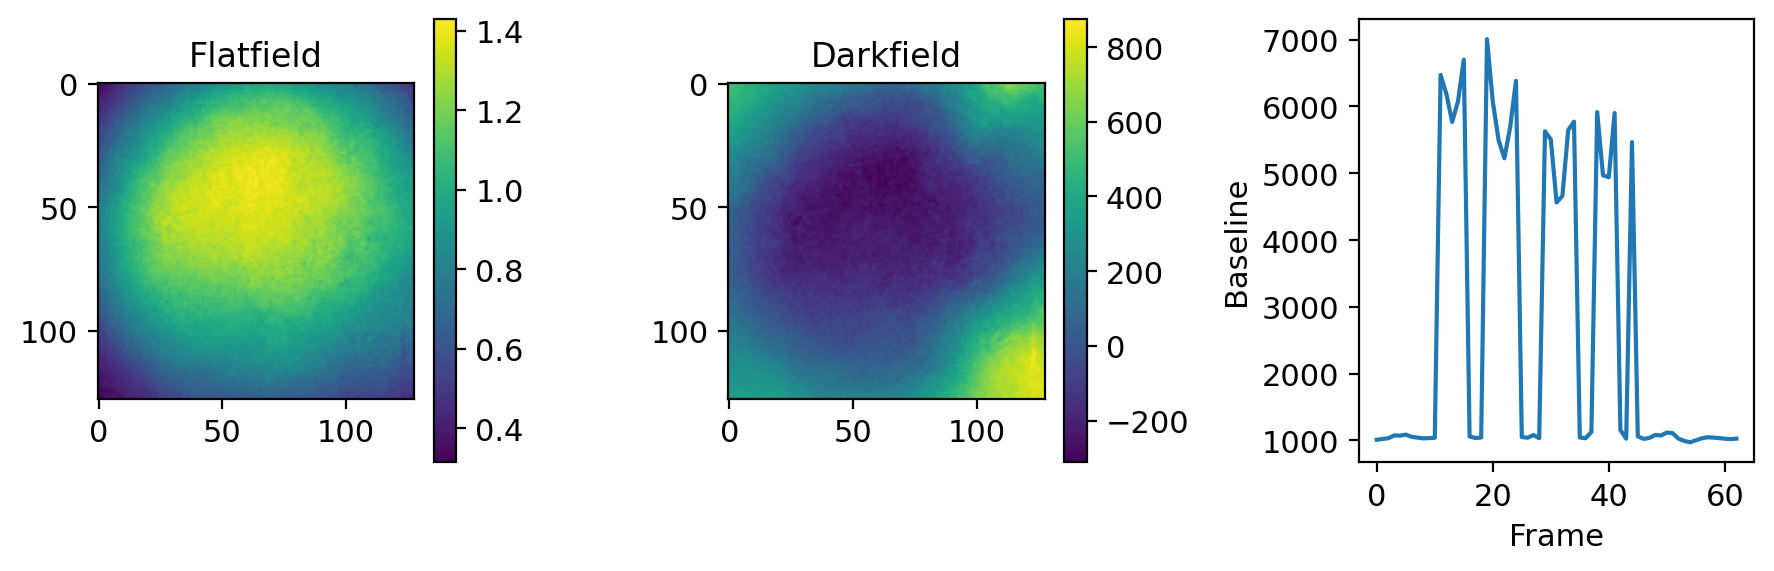

In [15]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images=bdata.wsi_brain()
basic =BaSiC(get_darkfield=True)
basic.fit(images)

fig,axes = plt.subplots(1,3,figsize=(9,3))
im=axes[0].imshow(basic.flatfield)
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Flatfield')
im=axes[1].imshow(basic.darkfield)
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Darkfield')
axes[2].plot(basic.baseline)
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Baseline')
fig.tight_layout()

In [16]:
images_transformed=basic.transform(images)

INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:unshading in 4 threads
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.017654609000032906 seconds ===


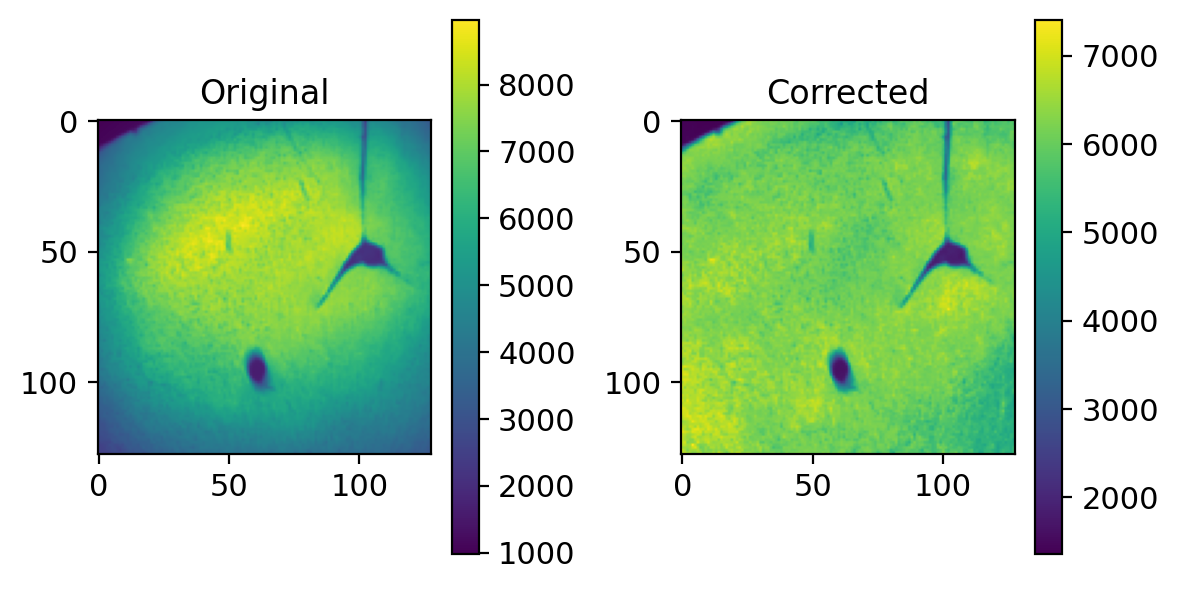

In [18]:
i=12
fig,axes = plt.subplots(1,2,figsize=(6,3))
im=axes[0].imshow(images[i])
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Original')
im=axes[1].imshow(images_transformed[i])
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Corrected')
fig.tight_layout()